In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.cluster import KMeans
import seaborn as sns
import math

In [3]:
file_name = "iris.txt"
data = np.loadtxt(file_name)
size = data.shape[0]
cluster_num = 3

In [4]:
iris1 = pd.read_csv('iris.csv')

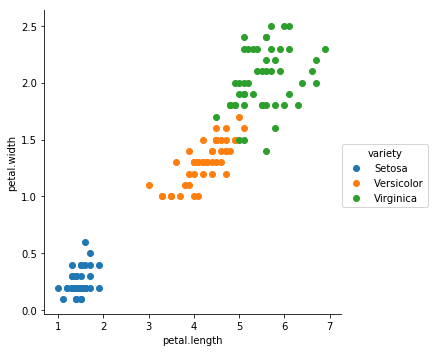

In [5]:
sns.FacetGrid(iris1,hue='variety',size=5) \
    .map(plt.scatter, 'petal.length','petal.width') \
    .add_legend()

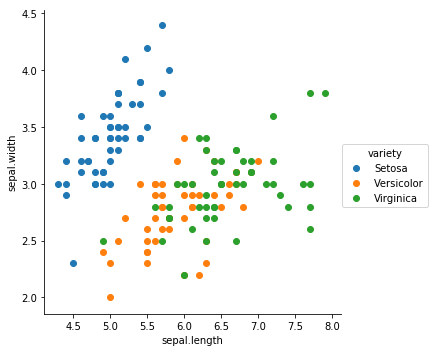

In [6]:
sns.FacetGrid(iris1,hue='variety',size=5) \
    .map(plt.scatter, 'sepal.length','sepal.width') \
    .add_legend()

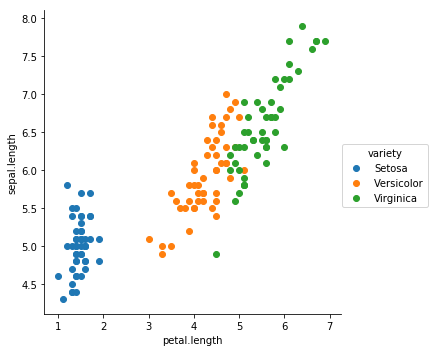

In [7]:
sns.FacetGrid(iris1,hue='variety',size=5) \
    .map(plt.scatter, 'petal.length','sepal.length') \
    .add_legend()

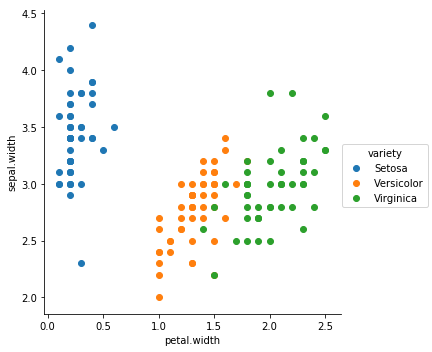

In [8]:
sns.FacetGrid(iris1,hue='variety',size=5) \
    .map(plt.scatter, 'petal.width','sepal.width') \
    .add_legend()

In [9]:
similarity = np.zeros((size,size))

In [170]:
alpha = 4

In [171]:
for i in range(size):
    for j in range(i,size):
        a = 0
        if (i != j):
            a = math.exp((-1/alpha)*(pow((data[i,0] - data[j,0]),2) + 
                            pow((data[i,1] - data[j,1]) , 2) + 
                            pow((data[i,2] - data[j,2]) , 2) + 
                            pow((data[i,3] - data[j,3]) , 2)))
        similarity[i,j] = a
        similarity[j,i] = a

In [172]:
D = np.zeros((size,size))

In [173]:
for i in range(size):
    summ = 0
    for j in range(size):
        summ += similarity[i,j]
    D[i,i] = summ

In [174]:
L = np.zeros((size,size))

In [175]:
for i in range(size):
    for j in range(size):
        L[i,j] = D[i,j] - similarity[i,j]

In [176]:
w, v = LA.eigh(L)

In [177]:
k = cluster_num

In [178]:
for i in range(1 , size - k + 1):
    v = np.delete(v,size - i,1)

In [179]:
kmeans = KMeans(n_clusters=k).fit(v)

In [180]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [181]:
kmeans.cluster_centers_

array([[ 0.08164966,  0.05569968,  0.02091202],
       [ 0.08164966, -0.11351615, -0.01068913],
       [ 0.08164966,  0.09097938, -0.49800309]])

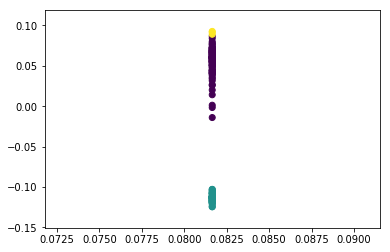

In [182]:
plt.scatter(v[:, 0], v[:, 1], c=kmeans.labels_)